## Domaći zadatak 2 - Nenadgledano učenje
### Studenti:

Đurađ Gvozdenović 1329

Vesna Stojanović 1339


### Data set
Korišćeni data set se nalazi na sledećem linku: https://www.kaggle.com/lava18/google-play-store-apps

### Importovanje potrebnih paketa za rad sa algoritmima nenadgledanog učenja


In [387]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator

### Ucitavanje skupa podataka

In [388]:
data_df = pd.read_csv("googleplaystore.csv")

In [389]:
data_df.shape

(10840, 13)

### Deskriptivna analiza podataka
Samo za numeričke podatke

In [390]:
data_df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


#### Deskriptivna analiza podataka
Prikaz numeričkih i kategoričkih podataka

In [391]:
data_df.head(5)

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


#### Prikaz vrednosti atributa Category 

In [392]:
def value_counts_two(column):
    value = column.value_counts()
    label = column.value_counts().index
    return label, value

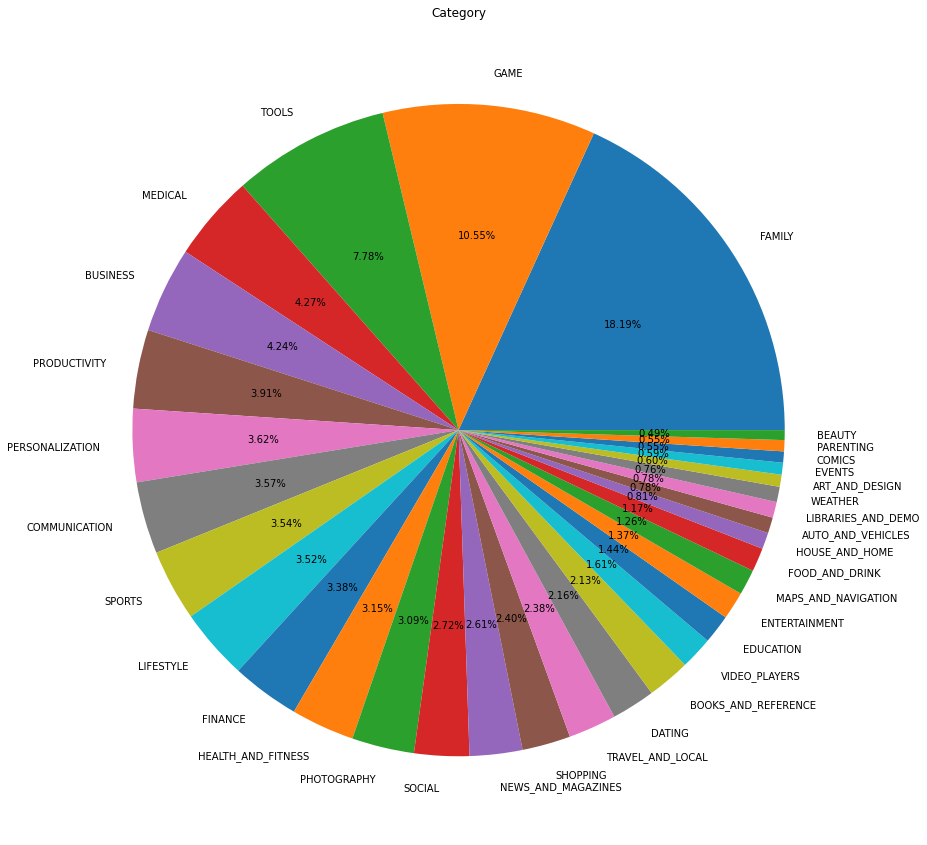

In [393]:
category_labels,category_value = value_counts_two(data_df['Category'])
fig = plt.figure(figsize =(15, 15)) 
plt.pie(category_value, labels = category_labels, autopct='%1.2f%%')
plt.title('Category')
plt.show()

#### Prikaz vrednosti atributa Installs 

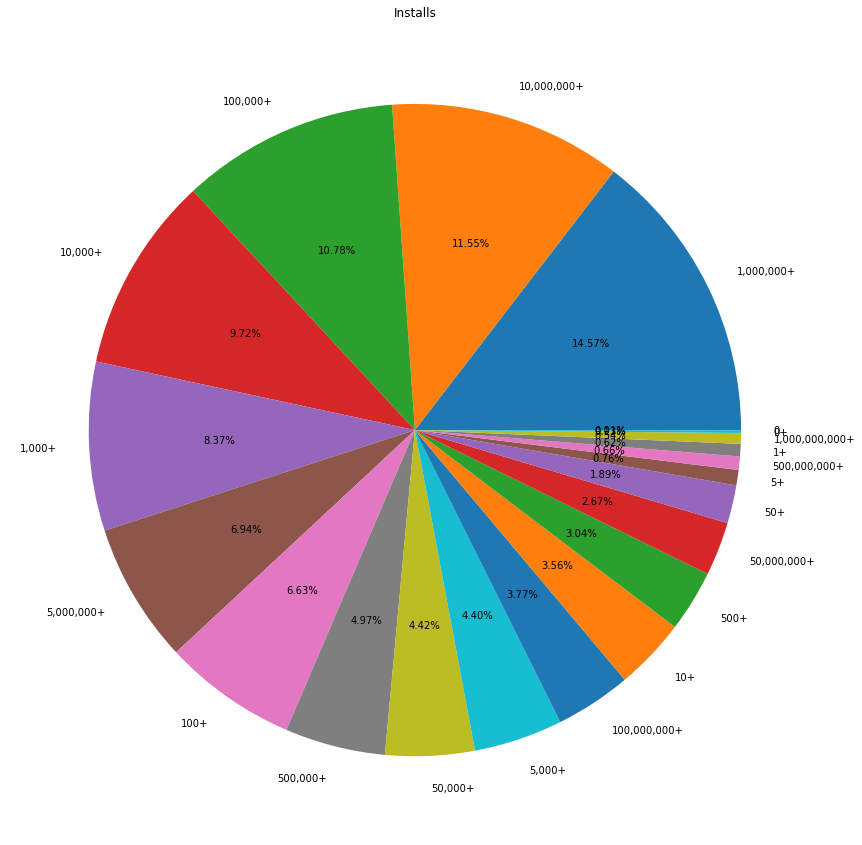

In [394]:
category_labels,category_value = value_counts_two(data_df['Installs'])
fig = plt.figure(figsize =(15, 15)) 
plt.pie(category_value, labels = category_labels, autopct='%1.2f%%')
plt.title('Installs')
plt.show()

#### Prikaz vrednosti atributa Rating 


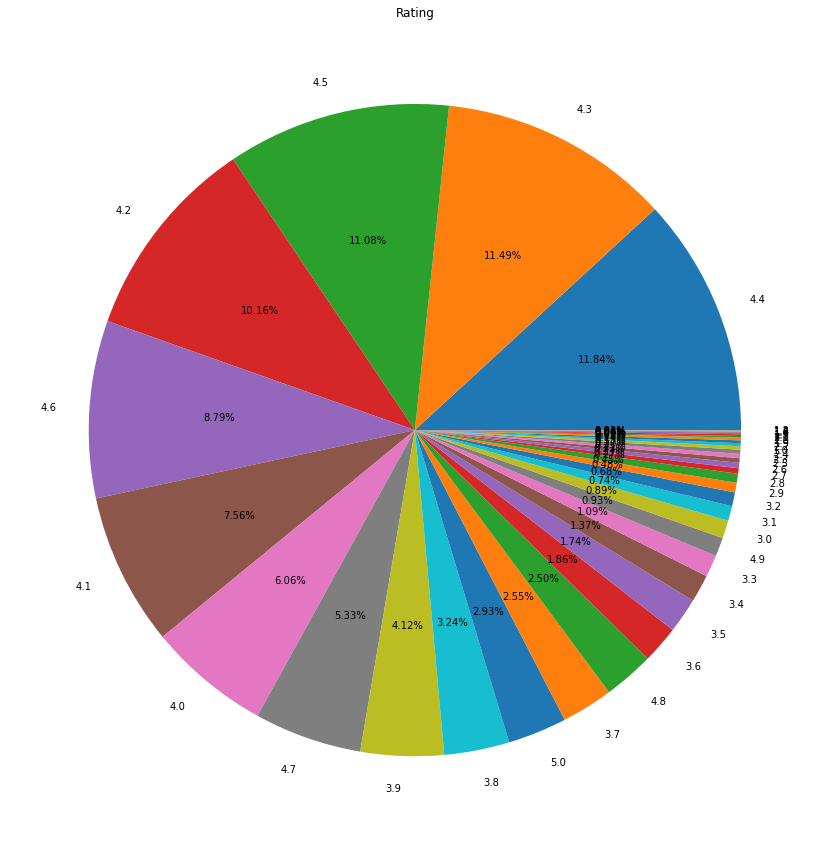

In [395]:
category_labels,category_value = value_counts_two(data_df['Rating'])
fig = plt.figure(figsize =(15, 15)) 
plt.pie(category_value, labels = category_labels, autopct='%1.2f%%')
plt.title('Rating')
plt.show()

#### Prikaz vrednosti atributa Content Rating 

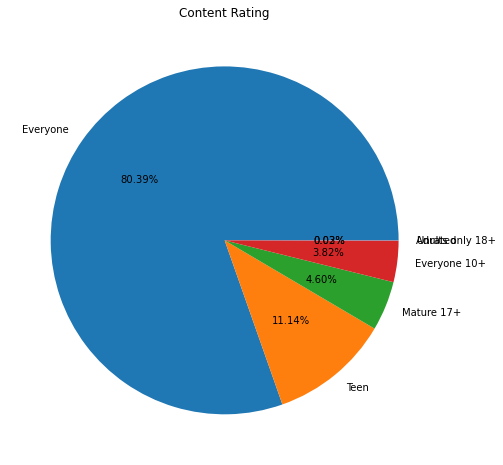

In [396]:
con_rating_labels,con_rating_value = value_counts_two(data_df['Content Rating'])
fig = plt.figure(figsize =(8, 8)) 
plt.pie(con_rating_value, labels = con_rating_labels, autopct='%1.2f%%')
plt.title('Content Rating')
plt.show() 

#### Prikaz vrednosti atributa Genres


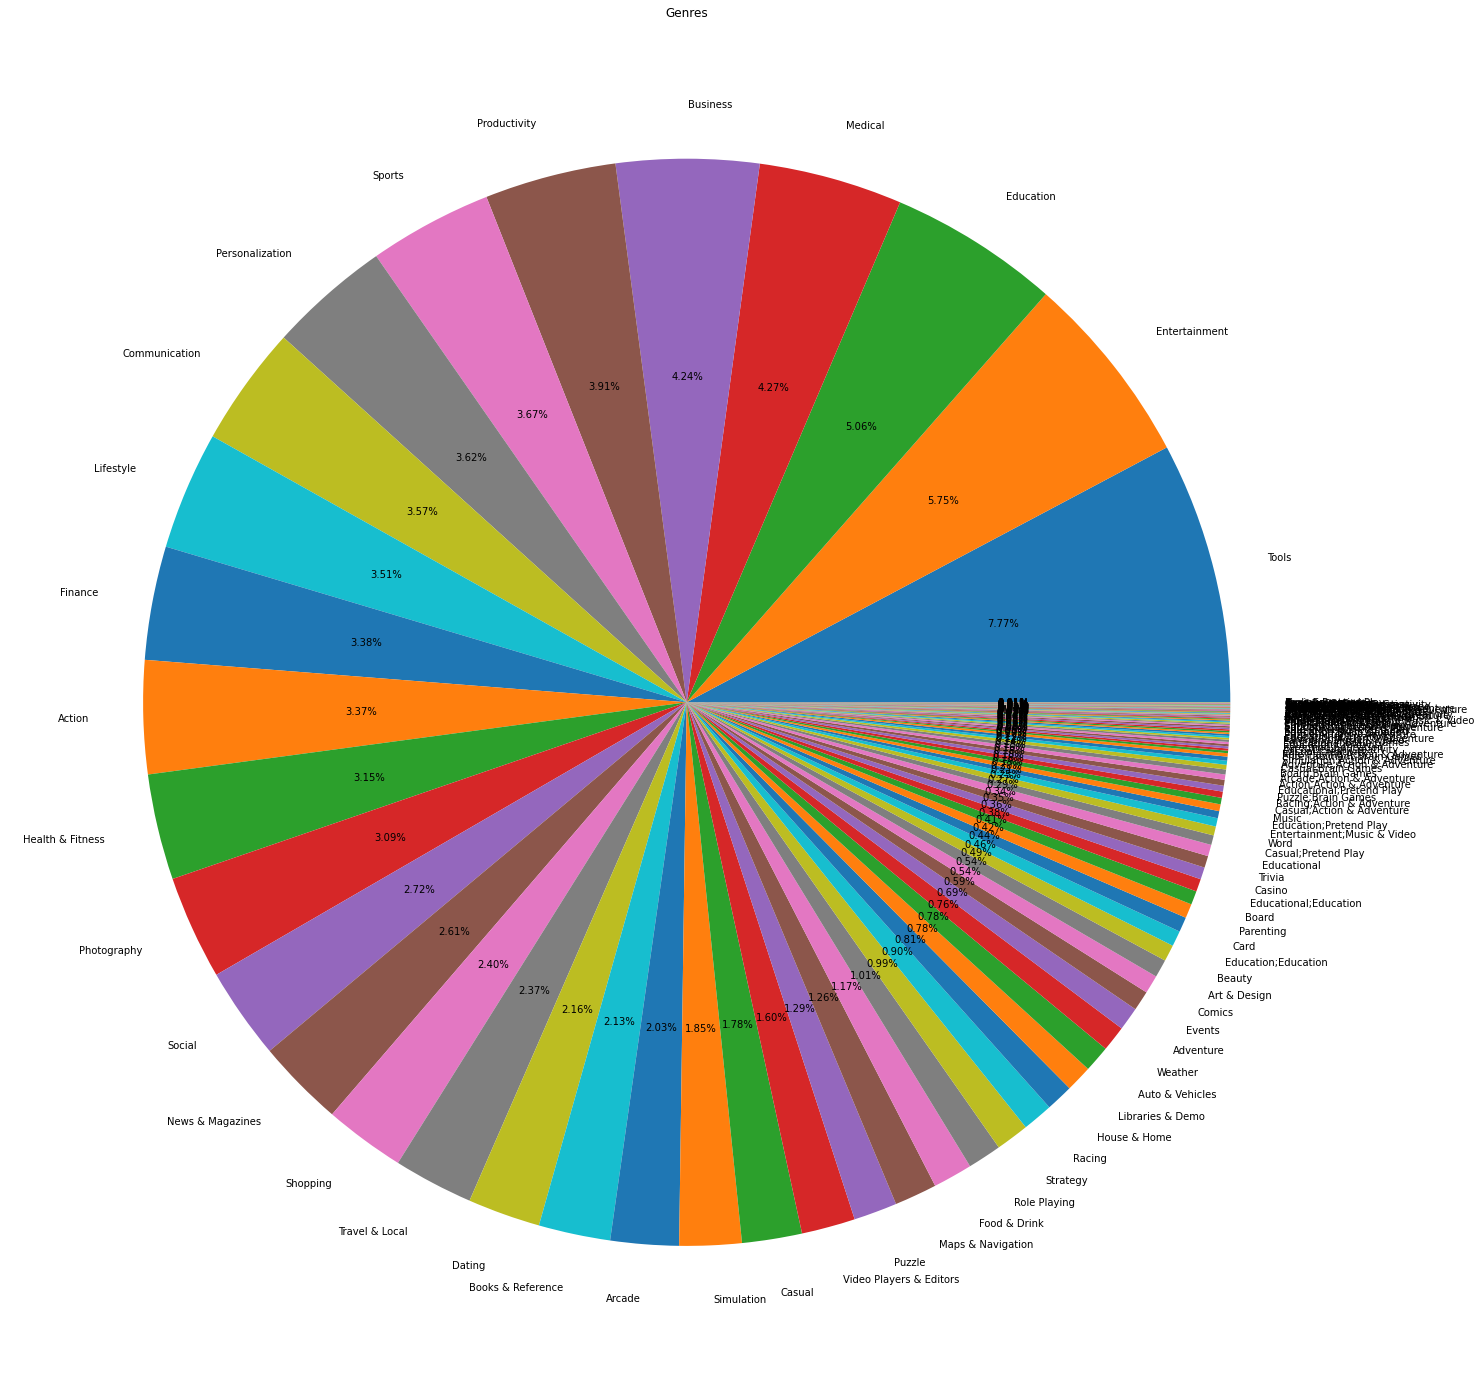

In [397]:
type_labels,type_value = value_counts_two(data_df['Genres'])
plt.figure(figsize =(25, 25))
plt.pie(type_value, labels = type_labels, autopct='%1.2f%%')
plt.title('Genres')
plt.show() 

#### Prikaz vrednosti atributa Price


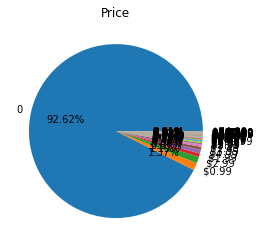

In [398]:
type_labels,type_value = value_counts_two(data_df['Price'])
plt.pie(type_value, labels = type_labels, autopct='%1.2f%%')
plt.title('Price')
plt.show() 

#### Prikaz vrednosti atributa Type


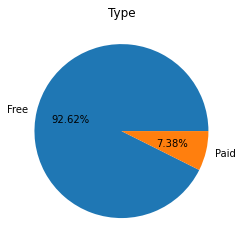

In [399]:
type_labels,type_value = value_counts_two(data_df['Type'])
plt.pie(type_value, labels = type_labels, autopct='%1.2f%%')
plt.title('Type')
plt.show() 

In [400]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9366 non-null   float64
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


### Provera null vrednosti

In [401]:
data_df.isnull().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [402]:
data_df = data_df.dropna()

In [403]:
data_df.count()

Rating            9360
App               9360
Category          9360
Reviews           9360
Size              9360
Installs          9360
Type              9360
Price             9360
Content Rating    9360
Genres            9360
Last Updated      9360
Current Ver       9360
Android Ver       9360
dtype: int64

### Prevođenje kategoričkih vrednosti u numeričke vrednosti 

In [404]:
def extract_digits_from_string(value):
    digits = list(filter(str.isdigit, value))
    if len(digits)>0:
        return int(''.join(filter(str.isdigit, value)))
    else:
        return None

def format_version(version):
    version_digits = extract_digits_from_string(version)
    if version_digits is None:
        return None 
    return float("0." + str(version_digits))

def format_categorical_columns(column):
    categoty_dict_reverse = dict(enumerate(column.unique()))
    category_dict = dict(zip(categoty_dict_reverse.values(), categoty_dict_reverse.keys()))
    new_values = []
    for val in column:
        new_values.append(category_dict[val])
    return new_values

def format_size(column):
    arr = []
    for r in column:
        if(r[-1]=='k'): 
            value = float(r[:-1])*0.001 
        elif r[-1]=='M':
            value = float(r[:-1]) 
        else:
            value = None
        arr.append(value)
    return arr

def format_installs(column):
    new_values = []
    for val in column:
        new_values.append(extract_digits_from_string(val))
    return new_values

def format_last_updated(column):
    return pd.to_datetime(column).apply(lambda x: int(x.value/(10**9)))

def format_versions(column):
    new_values = []
    for val in column:
        new_values.append(format_version(val))
    return new_values

In [405]:
data_df.loc[:,'Android Ver'] = format_versions(data_df['Android Ver'])
data_df.loc[:,'Current Ver'] = format_versions(data_df['Current Ver'])
data_df.loc[:,'Installs'] = format_installs(data_df['Installs'])
data_df.loc[:,'Last Updated'] = format_last_updated(data_df['Last Updated'])
data_df.loc[:,'Category'] = format_categorical_columns(data_df['Category'])
data_df.loc[:,'Genres'] = format_categorical_columns(data_df['Genres'])
data_df.loc[:,'Content Rating'] = format_categorical_columns(data_df['Content Rating'])
data_df.loc[:,'Size'] = format_size(data_df['Size'])

### Provera null vrednosti

In [406]:
data_df.isnull().sum()

Rating               0
App                  0
Category             0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1425
Android Ver       1319
dtype: int64

### Izbacivanje atributa "Type" i "Price" na osnovu histograma

In [407]:
data_df = data_df.drop("Type", axis=1)
data_df = data_df.drop("Price", axis=1)

In [408]:
data_df.set_index("App", inplace = True)

In [409]:
for column in list(data_df.columns):
    data_df.fillna((data_df[column].mean()), inplace=True)

### Provera null vrednosti

In [410]:
data_df.isnull().sum()

Rating            0
Category          0
Reviews           0
Size              0
Installs          0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Provera skupa podataka nakon izbačenih vrednosti atributa

In [411]:
data_df.shape

(9360, 10)

In [412]:
data_df.describe()

,Rating,Category,Reviews,Size,Installs,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9360.000000,9360.000000,9.360000e+03,9360.000000,9.360000e+03,9360.000000,9360.000000,9.360000e+03,9360.000000,9360.000000
mean,4.191838,17.782799,5.143767e+05,19.686204,1.790875e+07,0.350214,49.806731,1.511960e+09,0.864652,0.923573
std,0.515263,7.329874,3.145023e+06,22.463226,9.126637e+07,0.783552,34.100336,3.422886e+07,1.421232,1.326065
min,1.000000,0.000000,1.000000e+00,0.008500,1.000000e+00,0.000000,0.000000,1.274400e+09,0.100000,0.100000
25%,4.000000,14.000000,1.867500e+02,4.191838,1.000000e+04,0.000000,19.000000,1.507507e+09,0.124000,0.400000
50%,4.300000,18.000000,5.955000e+03,9.500000,5.000000e+05,0.000000,38.000000,1.527811e+09,0.228000,0.410000
75%,4.500000,23.000000,8.162750e+04,27.000000,5.000000e+06,0.000000,88.000000,1.532390e+09,0.521000,0.440000
max,5.000000,32.000000,7.815831e+07,100.000000,1.000000e+09,5.000000,114.000000,1.533686e+09,4.191838,4.191838


### Prikaz histograma

array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Category'}>,
        <AxesSubplot:title={'center':'Reviews'}>],
       [<AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'Installs'}>,
        <AxesSubplot:title={'center':'Content Rating'}>],
       [<AxesSubplot:title={'center':'Genres'}>,
        <AxesSubplot:title={'center':'Last Updated'}>,
        <AxesSubplot:title={'center':'Current Ver'}>],
       [<AxesSubplot:title={'center':'Android Ver'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

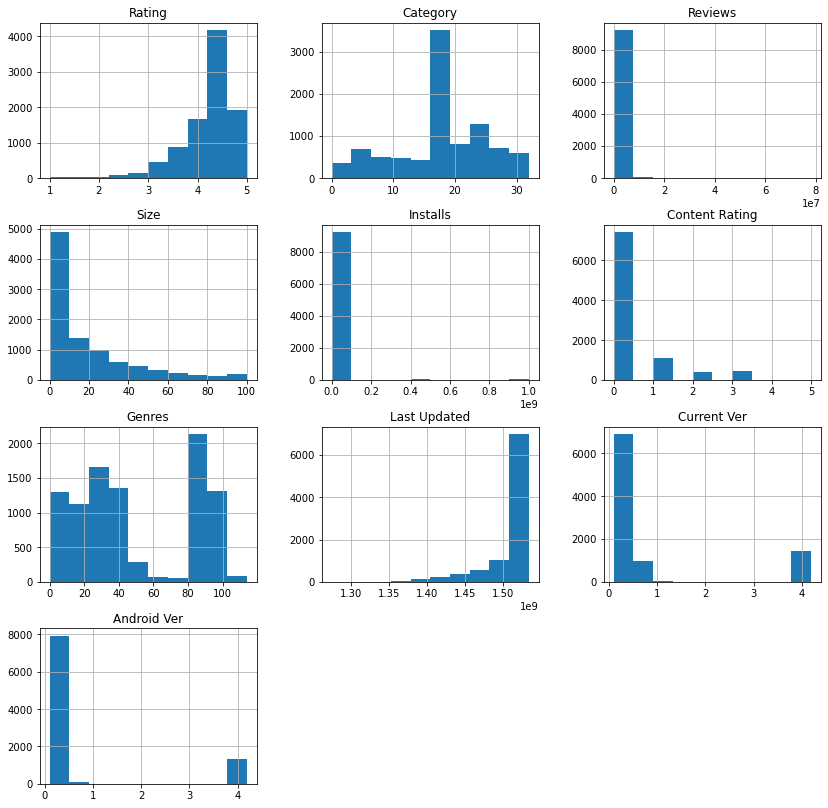

In [413]:
data_df.hist(figsize = (14,14))

### Matrica korelacije atributa


<AxesSubplot:>

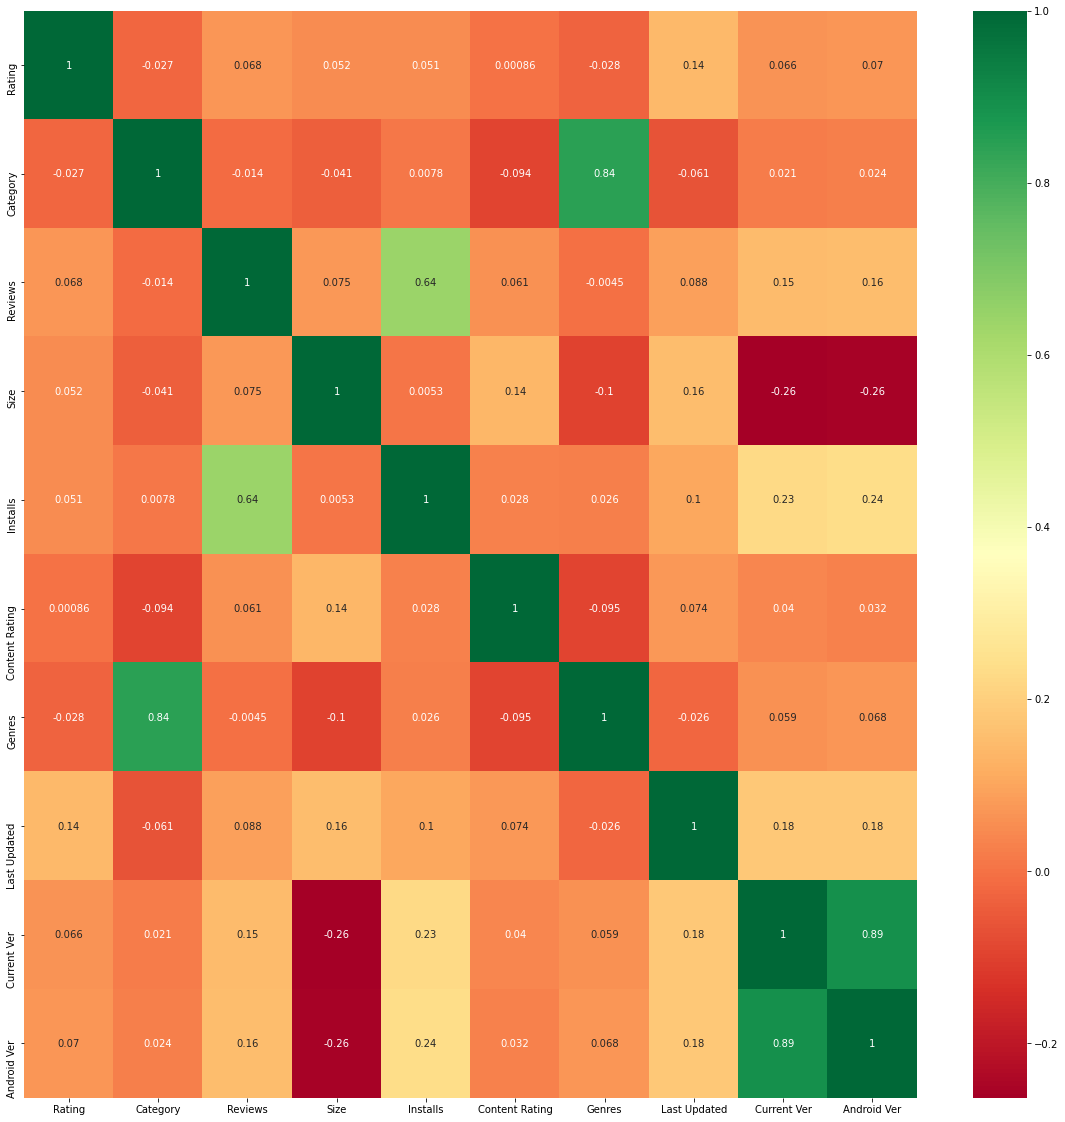

In [414]:
X_f = data_df.iloc[:,0:11]  #independent columns
y_f = data_df.iloc[:,-1]    #target column i.e price range
corrmat = data_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(data_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [415]:
non_scaled_data_df = data_df.copy()
minmax_scaler = preprocessing.MinMaxScaler()
for column in list(data_df.columns):
    feature = data_df[column].to_numpy().reshape(-1, 1)
    scaled_feature = minmax_scaler.fit_transform(feature)
    data_df.loc[:, column] = scaled_feature

### Prikaz skupa podataka nakon prevođenja u numeričke vrednosti podataka

In [416]:
data_df

,Rating,Category,Reviews,Size,Installs,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,0.775,0.00000,2.021538e-06,0.189931,9.999000e-06,0.0,0.000000,0.929024,0.000000,0.074050
Coloring book moana,0.725,0.00000,1.235953e-05,0.139927,4.999990e-04,0.0,0.008772,0.931689,0.024439,0.074050
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",0.925,0.00000,1.119638e-03,0.086922,4.999999e-03,0.0,0.000000,0.997667,0.005865,0.074050
Sketch - Draw & Paint,0.875,0.00000,2.759054e-03,0.249936,5.000000e-02,0.2,0.000000,0.979673,1.000000,0.078204
Pixel Draw - Number Art Coloring Book,0.825,0.00000,1.235953e-05,0.027917,9.999900e-05,0.0,0.017544,0.983672,0.002444,0.083092
...,...,...,...,...,...,...,...,...,...,...
FR Calculator,0.750,0.56250,7.676727e-08,0.025917,4.990000e-07,0.0,0.105263,0.861380,0.000000,0.075761
Sya9a Maroc - FR,0.875,0.56250,4.733982e-07,0.529960,4.999000e-06,0.0,0.105263,0.873709,0.011731,0.075761
Fr. Mike Schmitz Audio Teachings,1.000,0.56250,3.838364e-08,0.035918,9.900000e-08,0.0,0.105263,0.989004,0.000000,0.075761


### Elbow method za određivanje broja klastera

In [417]:
def elbowMethod(x):
    score = []
    for cluster in range(1,11):
        kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
        kmeans.fit(x)
        score.append(kmeans.inertia_)
        
    plt.plot(range(1,11), score)
    plt.title('The Elbow Method')
    plt.xlabel('no of clusters')
    plt.ylabel('wcss')
    plt.show()
    return score

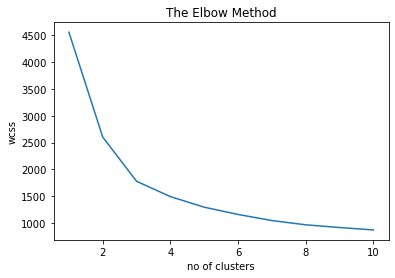

In [418]:
score = elbowMethod(data_df)
kn = KneeLocator(range(1,11), score, curve='convex', direction='decreasing')
PRED_NUM_CLUSTERS = kn.knee

### KMeans

In [419]:
clusterer = KMeans(n_clusters=PRED_NUM_CLUSTERS, random_state=10, algorithm="full")
cluster_labels = clusterer.fit_predict(data_df)

In [420]:
cluster_labels

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

### Silhouette score

In [421]:
silhouette_score(data_df, cluster_labels)

0.3905939833386539

In [422]:
data_df = data_df.drop("Current Ver", axis=1)
data_df = data_df.drop("Category", axis=1)

### PCA

In [423]:
pca = PCA(n_components=3, random_state=200, whiten=True)
pca.fit(data_df)

x_reduced = pca.transform(data_df)

In [424]:
reduced_data_df_all_features = pd.DataFrame(x_reduced)

### Elbow method za određivanje broja klastera 

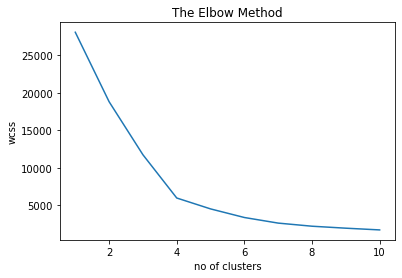

In [425]:
score = elbowMethod(reduced_data_df_all_features)
kn = KneeLocator(range(1,11), score, curve='convex', direction='decreasing')
PRED_NUM_CLUSTERS = kn.knee

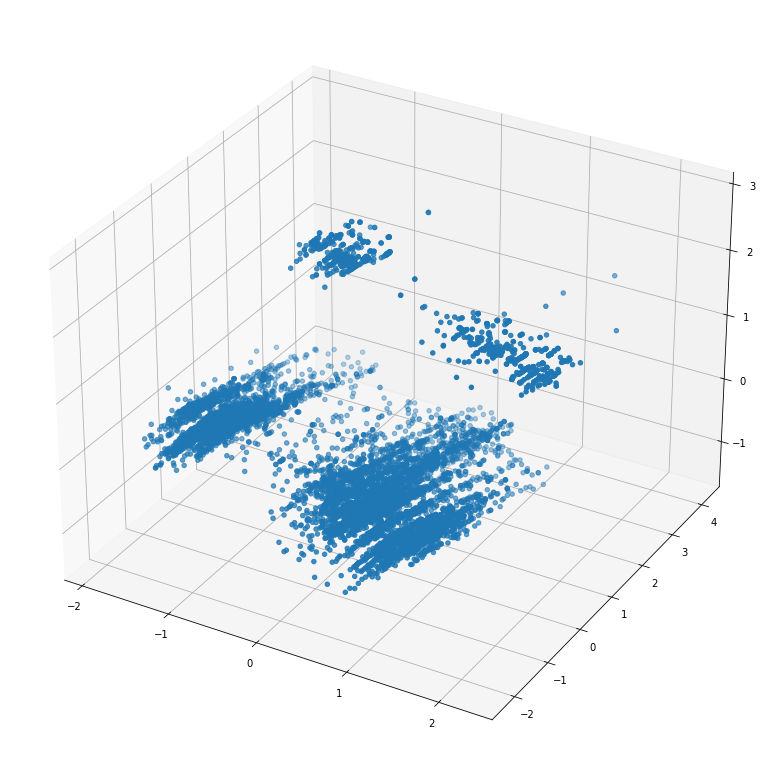

In [426]:
plt.figure(figsize = (14,14))
ax = plt.axes(projection='3d')
zdata = reduced_data_df_all_features.iloc[:, 0]
xdata = reduced_data_df_all_features.iloc[:, 1]
ydata = reduced_data_df_all_features.iloc[:, 2]
ax.scatter3D(xdata, ydata, zdata);

In [427]:
def plot3DClusters(data, labels):
    number_of_clusters = len(set(labels))
    plt.figure(figsize = (14,14))
    ax = plt.axes(projection='3d')
    for cluster in set(labels):
        cluster_mask = [elem == cluster for elem in labels]
        
        zdata = data.iloc[cluster_mask, 0]
        xdata = data.iloc[cluster_mask, 1]
        ydata = data.iloc[cluster_mask, 2]
        ax.scatter3D(xdata, ydata, zdata)

### KMeans

In [428]:
clusterer = KMeans(n_clusters=PRED_NUM_CLUSTERS)
cluster_labels = clusterer.fit_predict(reduced_data_df_all_features)
silhouette_score(reduced_data_df_all_features, cluster_labels)

0.5716462598769235

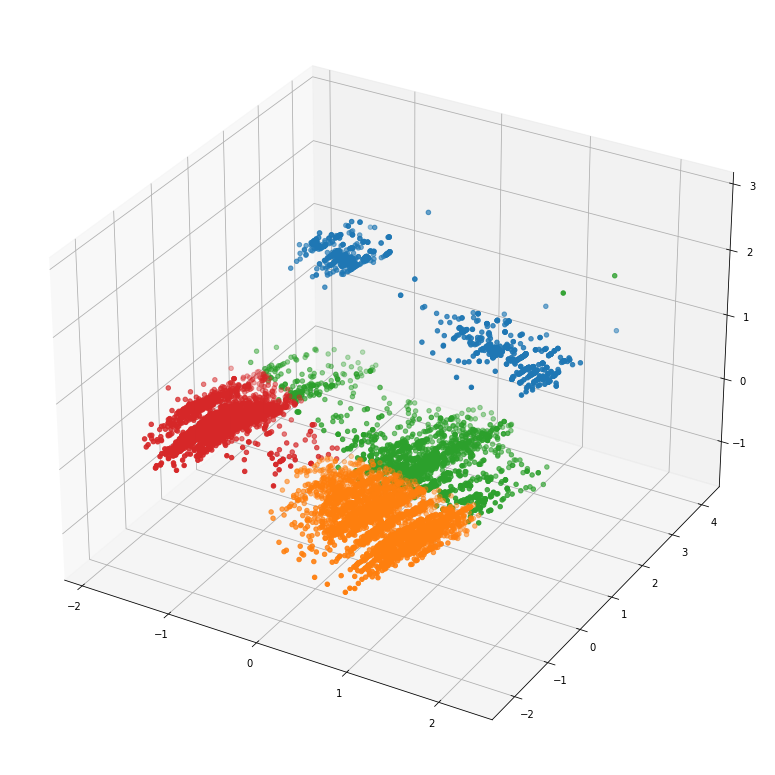

In [429]:
plot3DClusters(reduced_data_df_all_features, cluster_labels)

### Hierarchical Merging i AgglomerativeClustering

In [430]:
clusterer = AgglomerativeClustering(n_clusters=PRED_NUM_CLUSTERS, compute_distances=True)
cluster_labels = clusterer.fit_predict(reduced_data_df_all_features)
silhouette_score(reduced_data_df_all_features, cluster_labels)

0.5537870412867014

### Prikaz dendograma

Literatura: https://towardsdatascience.com/agglomerative-clustering-and-dendrograms-explained-29fc12b85f23

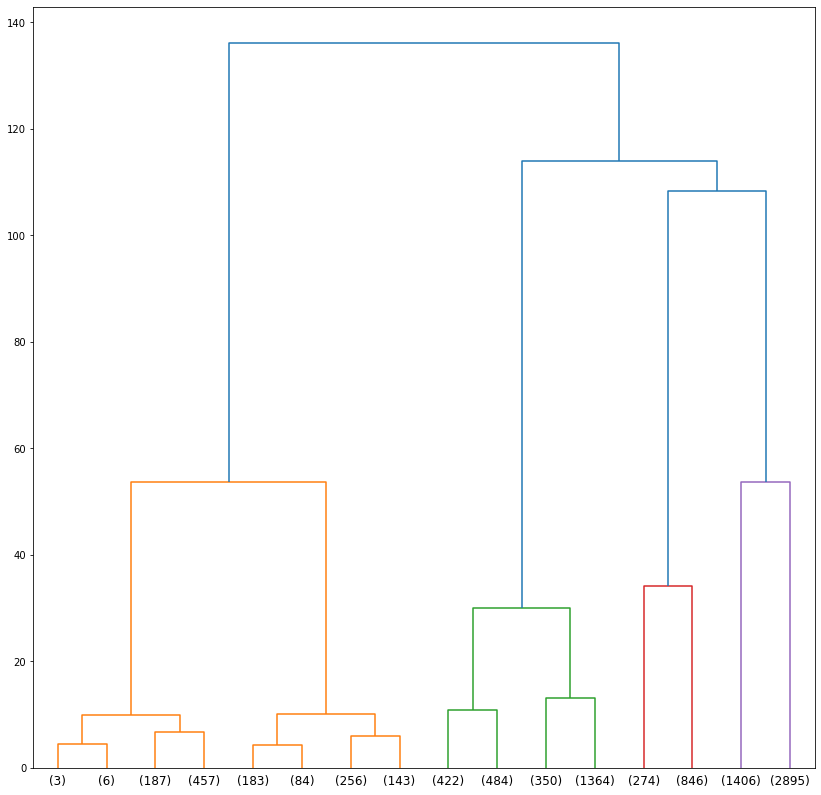

In [431]:
from scipy.cluster.hierarchy import dendrogram
counts = np.zeros(clusterer.children_.shape[0])
n_samples = len(clusterer.labels_)
for i, merge in enumerate(clusterer.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [clusterer.children_, clusterer.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
plt.figure(figsize = (14,14))
dendrogram(linkage_matrix, truncate_mode="level", p=3);

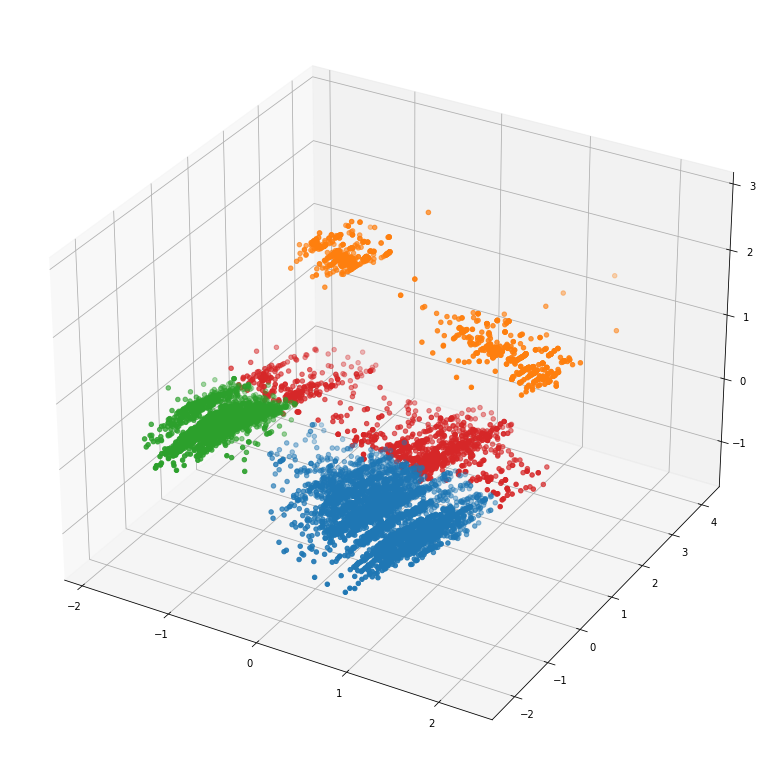

In [432]:
plot3DClusters(reduced_data_df_all_features, cluster_labels)

### SpectralClustering


In [433]:
clusterer = SpectralClustering(n_clusters=PRED_NUM_CLUSTERS)
cluster_labels = clusterer.fit_predict(reduced_data_df_all_features)
silhouette_score(reduced_data_df_all_features, cluster_labels)

0.5135670431924682

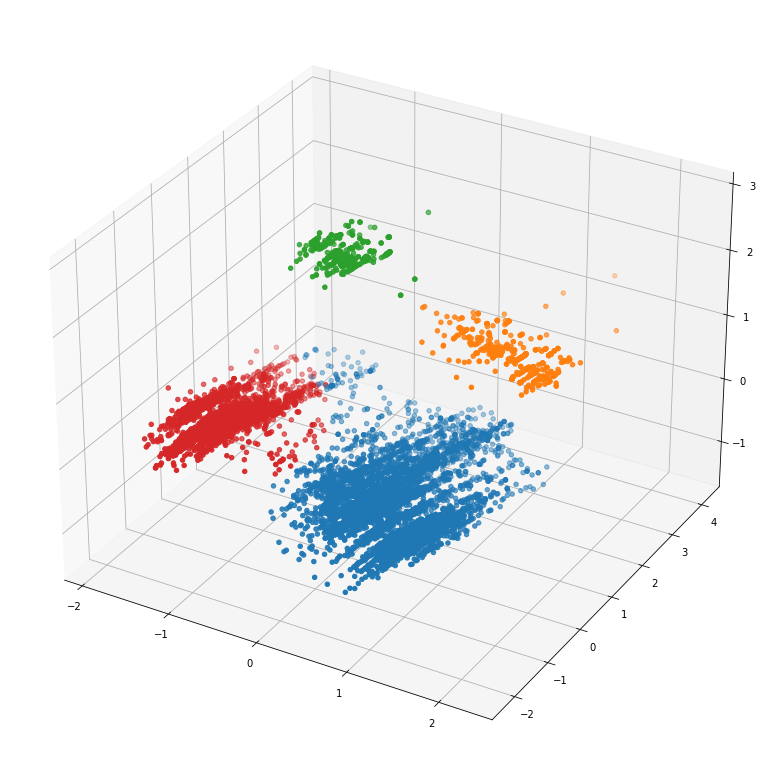

In [434]:
plot3DClusters(reduced_data_df_all_features, cluster_labels)

### DBScan

In [435]:
clusterer = DBSCAN()
cluster_labels = clusterer.fit_predict(reduced_data_df_all_features)
silhouette_score(reduced_data_df_all_features, cluster_labels)

0.4617453373678243

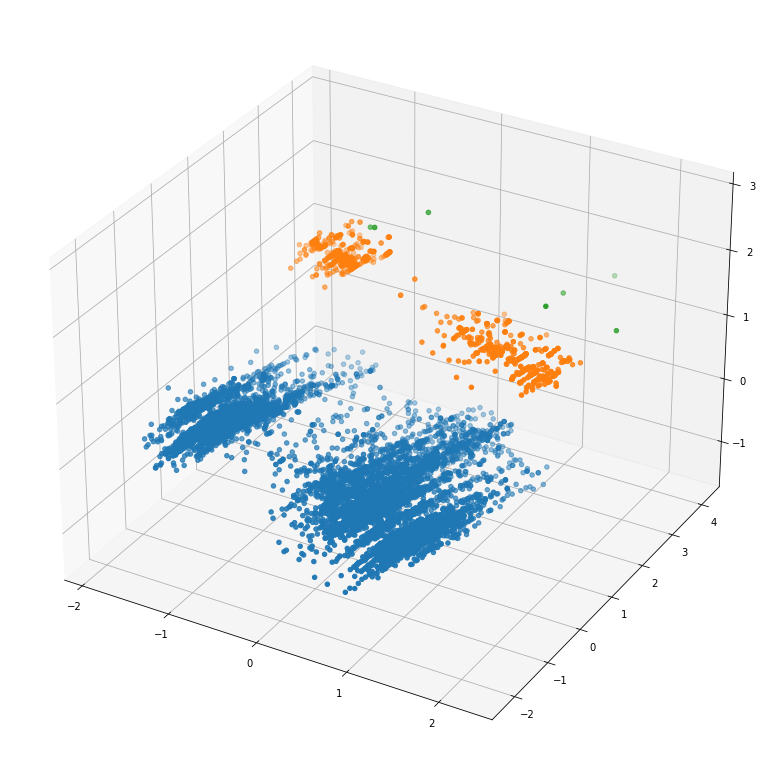

In [436]:
plot3DClusters(reduced_data_df_all_features, cluster_labels)

### Recursive Feature Elimination i Cross-Validation Selection

In [437]:
def rfecvSelection(dataframe, labels):
    estimator = SVR(kernel="linear")
    rfecv = RFECV(estimator=estimator, step=1,scoring="neg_mean_squared_error")
    y = labels
    #dataframe.drop(['Rating'],axis=1,inplace=True)
    rfecv.fit(dataframe.values,y)
    rfecv.transform(dataframe.values)
    print(rfecv.n_features_)
    print(rfecv.support_)
    print(rfecv.ranking_)
    return rfecv.get_support(1)

In [438]:
rfecvSelection(data_df, cluster_labels)

5
[False False  True  True False  True  True  True]
[3 4 1 1 2 1 1 1]


array([2, 3, 5, 6, 7])

In [439]:
data_df_reduced = data_df.iloc[:,[False, False,  True , True ,False , True, True,  True]]

### Prikaz data set-a nakon feature selection-a sa redukovanim brojem parametara

In [440]:
data_df_reduced

,Size,Installs,Genres,Last Updated,Android Ver
App,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,0.189931,9.999000e-06,0.000000,0.929024,0.074050
Coloring book moana,0.139927,4.999990e-04,0.008772,0.931689,0.074050
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",0.086922,4.999999e-03,0.000000,0.997667,0.074050
Sketch - Draw & Paint,0.249936,5.000000e-02,0.000000,0.979673,0.078204
Pixel Draw - Number Art Coloring Book,0.027917,9.999900e-05,0.017544,0.983672,0.083092
...,...,...,...,...,...
FR Calculator,0.025917,4.990000e-07,0.105263,0.861380,0.075761
Sya9a Maroc - FR,0.529960,4.999000e-06,0.105263,0.873709,0.075761
Fr. Mike Schmitz Audio Teachings,0.035918,9.900000e-08,0.105263,0.989004,0.075761


### PCA

In [441]:
pca = PCA(n_components=3, random_state=200, whiten=True)
pca.fit(data_df)

x_reduced = pca.transform(data_df)
data_df_reduced = pd.DataFrame(x_reduced)

### Elbow method za određivanje broja klastera sa redukovanim parametrima

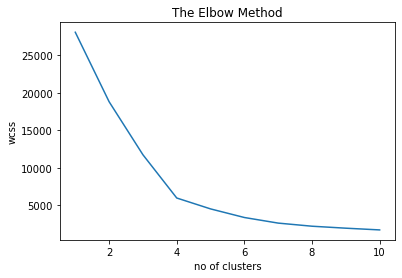

In [442]:
score = elbowMethod(data_df_reduced)
kn = KneeLocator(range(1,11), score, curve='convex', direction='decreasing')
PRED_NUM_CLUSTERS = kn.knee

### Testiranje metrika

### Spectral Clustering

In [443]:
clusterer = SpectralClustering(n_clusters=PRED_NUM_CLUSTERS)
cluster_labels = clusterer.fit_predict(data_df_reduced)
silhouette_score(data_df_reduced, cluster_labels)

0.5135670431924682

### Calinski harabasz 

In [444]:
calinski_harabasz_score(data_df_reduced, cluster_labels)

5307.34450001012

### Davies Bouldin  


In [445]:
davies_bouldin_score(data_df_reduced, cluster_labels)

0.6581019145041549

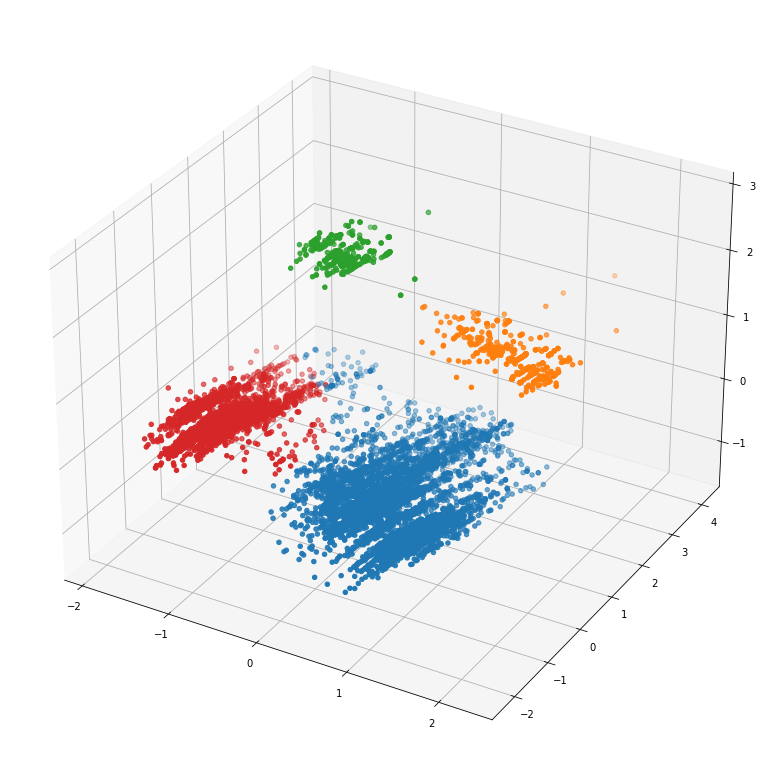

In [446]:
plot3DClusters(data_df_reduced, cluster_labels)

In [447]:
%matplotlib
%matplotlib inline

Using matplotlib backend: Qt5Agg


### Outlier detection
U primeru ispod prikazane su dve metode sa detekciju outliera: na osnovu IQR-a i 3 standardne devijacije. IQR - inter kvartilni opseg pretstavlja razliku izmedju vrednostu prvog i treceg kvartila i koristi se kako bi se odredile donja i gorna granica za detekciju outlier-a. Standardna devijacija - prosecno odstupanje od prosecne vrednosti. Ukoliko skup podataka ima normalnu raspodelu u intervalu [mean - 3std, mean + 3std] naci ce se 99,7% vrednosti. Ovo pravilo je moguce iskoristiti za eliminaciju preostalih 0,3 procenta vrednosti koje pretstavljaju outlier-e.

Prikazani su rezultati obe metode za detekciju outlier-a, IQR-zeleno i 3 std-crveno.

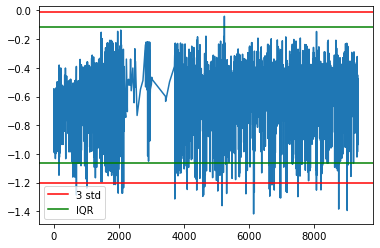

/home/djura/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


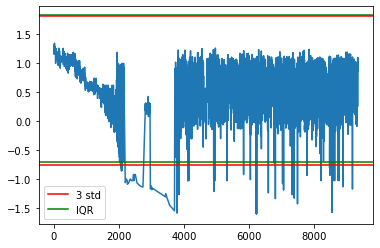

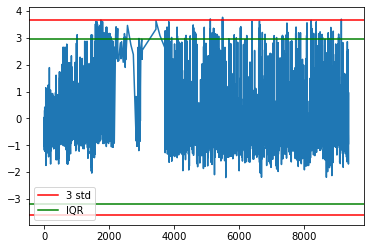

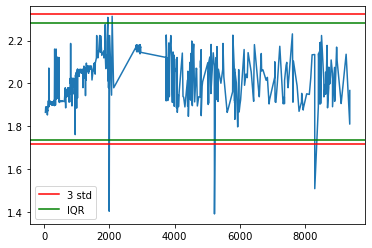

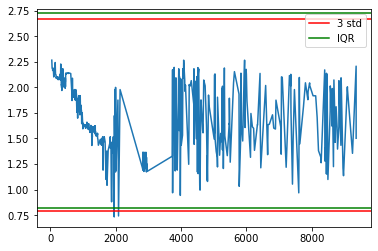

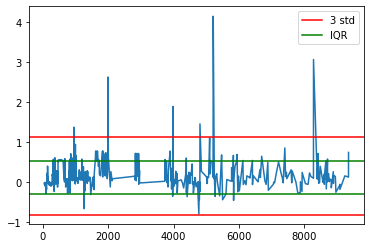

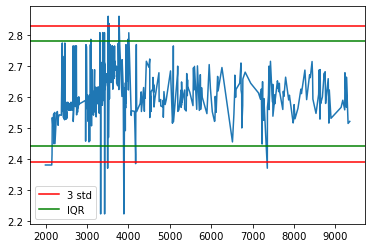

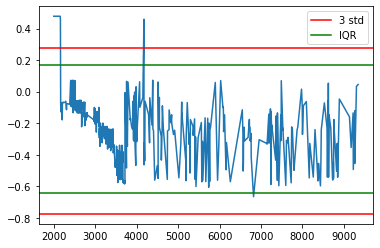

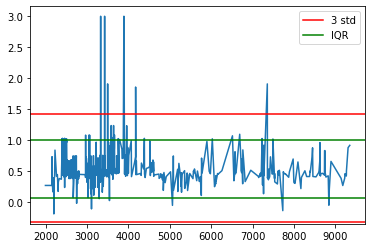

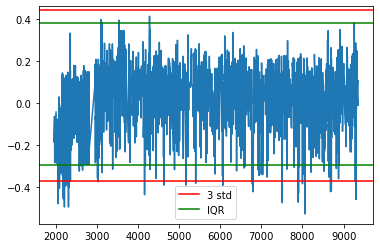

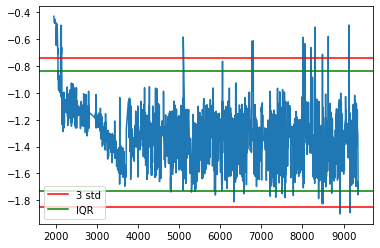

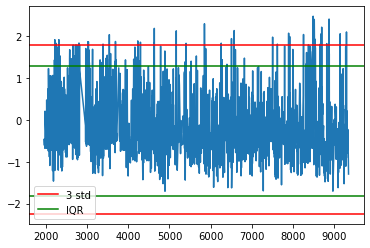

In [448]:
number_of_clusters = len(set(cluster_labels))
for cluster in set(cluster_labels):
    cluster_mask = [elem == cluster for elem in cluster_labels]


    fearure_df = data_df_reduced.iloc[cluster_mask, :]
    original_data_cluster = data_df.iloc[cluster_mask, :]
    non_scaled_cluster = non_scaled_data_df.iloc[cluster_mask, :]

    for i in range(fearure_df.shape[1]):

        feature = fearure_df.iloc[:, i]
        mean = feature.mean()
        std = feature.std()

        upper_limit = mean+3*std
        lower_limit = mean-3*std

        q1, q3 = np.percentile(feature, [25, 75])
        iqr = q3 - q1
        lower_bound_1 = q1 - (iqr * 1.5)
        upper_bound_1 = q3 + (iqr * 1.5)

        plt.figure()
        plt.plot(feature)
        plt.axhline(y=upper_limit, color='r', linestyle='-', label = "3 std")
        plt.axhline(y=lower_limit, color='r', linestyle='-')

        plt.axhline(y=lower_bound_1, color='g', linestyle='-', label = "IQR")
        plt.axhline(y=upper_bound_1, color='g', linestyle='-')
        plt.legend()
        plt.show()

        for j in range(len(feature)):
            if feature.values[j] > upper_limit:
                fearure_df.iloc[j,i] = None
                original_data_cluster.iloc[j,i] = None
                non_scaled_cluster.iloc[j,i] = None
            if feature.values[j] < lower_limit:
                fearure_df.iloc[j,i] = None
                original_data_cluster.iloc[j,i] = None
                non_scaled_cluster.iloc[j,i] = None
        data_df_reduced.iloc[cluster_mask, :] = fearure_df
        data_df.iloc[cluster_mask, :] = original_data_cluster
        non_scaled_data_df.iloc[cluster_mask, :] = non_scaled_cluster
data_df_reduced = data_df_reduced.dropna()
non_scaled_data_df = non_scaled_data_df.dropna()
data_df = data_df.dropna()

In [449]:
clusterer = SpectralClustering(n_clusters=PRED_NUM_CLUSTERS)
cluster_labels = clusterer.fit_predict(data_df_reduced)
silhouette_score(data_df_reduced, cluster_labels)

0.5360679907276888

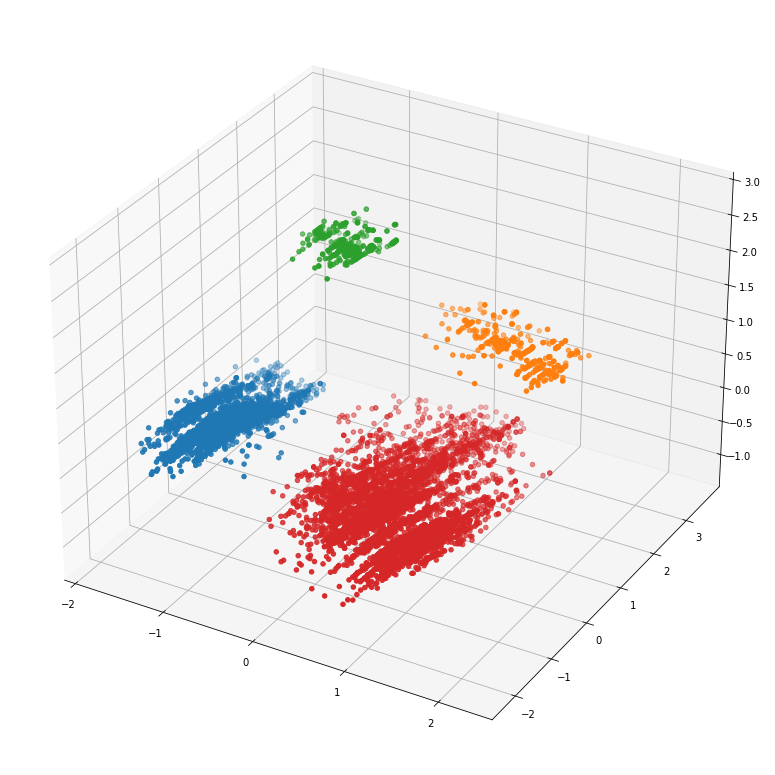

In [450]:
plot3DClusters(data_df_reduced, cluster_labels)

### Prikaz podataka po klasterima
Korišćena literatura sa linka: https://towardsdatascience.com/cluster-analysis-create-visualize-and-interpret-customer-segments-474e55d00ebb

In [452]:
test_df = data_df.copy()
test_df['label'] = cluster_labels
df_mean = (test_df.groupby('label').mean())

<AxesSubplot:xlabel='label', ylabel='value'>

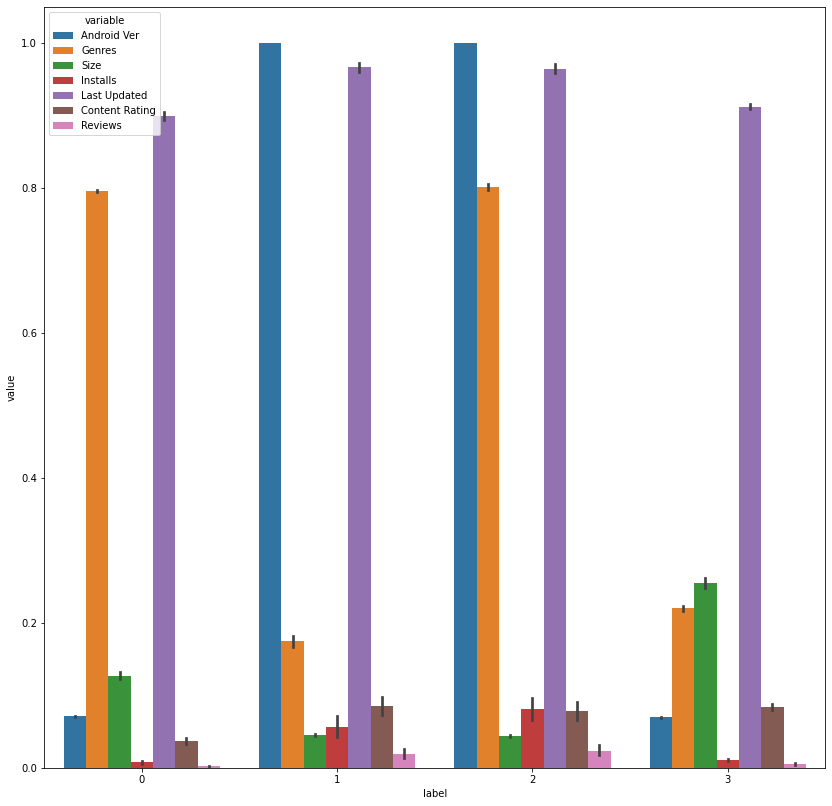

In [453]:
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(10).Variable.values) + ['label']
tidy = test_df[selected_columns].melt(id_vars='label')
plt.figure(figsize = (14,14))
sns.barplot(x='label', y='value', hue='variable', data=tidy)

In [454]:
df_mean

,Rating,Reviews,Size,Installs,Content Rating,Genres,Last Updated,Android Ver
label,,,,,,,,
0,0.785005,0.002003,0.127269,0.007407,0.036960,0.796059,0.898708,0.071300
1,0.818874,0.019448,0.044965,0.056317,0.084932,0.174531,0.966327,1.000000
2,0.819696,0.023803,0.044350,0.080513,0.078003,0.801065,0.964444,1.000000
3,0.799216,0.005250,0.254824,0.010374,0.083425,0.219947,0.912090,0.069617


### Zaključak
Na osnovu prikazane analize možemo zaključiti da atributi Android Version i Genres najviše utiču na formiranje klastera. Možemo uociti i da Rewiews, Content Rating i Last Updated najmanje utiču na kreiranje klastera. 
Takođe možemo zaključiti da je klastering algoritam podelio ceo data set u 2 skupa na osnovu Android Version, gde je u jednom skupu Android Version uzeo višu a u drugom nižu vrednost pa je ta dva skupa podelio na po jos dva skupa u zavisnost od  atributa Genres. Kao konačan rezultat dobijamo 4 klastera. Primenjena su više algoritama za klasterizaciju: KMeans, DBScan, Hierarchical Merging i AgglomerativeClustering kao i Recursive Feature Elimination i Cross-Validation Selection, metrike poput PCA, Silhouette score, Spectral Clustering, Calinski harabasz, Davies Bouldin i Elbow method za određivanje broja klastera.